In [1]:
import pandas as pd

df = pd.read_json('/workspace/data/hn/stories_dump.jsonl', lines=True)
df.to_feather('/workspace/data/hn/stories_dump.feather')

df.describe()

In [1]:
import pandas as pd

df = pd.read_feather('/workspace/data/hn/stories_dump.feather')

In [2]:
df.rename(columns={'descendants': 'comments'}, inplace=True)

df['time'] = pd.to_datetime(df['time'], unit='s')

In [3]:
# Deduplicate stories based on the URL. Keep the one with the highest score.

print(df.shape)

df.sort_values(by=['score'], ascending=False, inplace=True)
df = df.drop_duplicates(subset=['url'], keep='first')

print(df.shape)

(4920000, 12)
(3784295, 12)


In [17]:
df[(df.score > 20) | (df.comments > 10)].size

5855052

In [4]:
df['probably_frontpage'] = df['score'] > 50
df['has_text'] = df['text'].notnull()

# Show a 2x2 table of the number of stories that are probably frontpage and have text.
df.groupby(['probably_frontpage', 'has_text']).size().unstack()

has_text,False,True
probably_frontpage,,
False,2385015,1144317
True,225009,29954


<Axes: xlabel='week'>

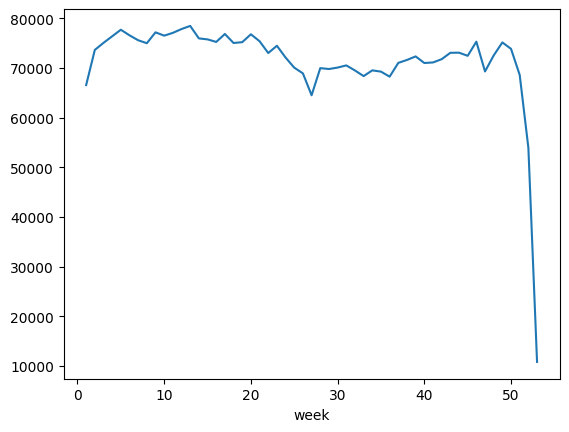

In [21]:
# Graph the number of stories by week

df['week'] = df['time'].dt.year + '-' +  df['time'].dt.isocalendar().week


df['week'].value_counts().sort_index().plot()